Movie Recommender System
==============

## Introduction

### Problem Statement

The aim of the project is to explore different methodologies to build and implement a recommender system that will recommend movies based on information from the MovieLens dataset. This dataset will be updated with data scraped from the corresponding IMDb pages for each movie. 

[Collaborative filtering](https://en.wikipedia.org/wiki/Collaborative_filtering) and [content based filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering), will be used on the cleaned dataset and their accurary at predicting ratings will be evaluated.

Finally a basic recommender system will be built based on the most accurate model.

## Datasets

In [1]:
import pandas as pd
import numpy as np

### MovieLens

#### movies.dat

The file contains data on 3,883 movies in the format **MovieID::Title::Genres**.


|Item    | Description    |
|------ | ------|
|MovieID    | an integer, ranging from 1 to 3952, that identifies a movie   |
|Title    | a String that concatenates movie title and year of release (between brackets)   |
|Genres    | a list of genres    |

First step is to read the movies dataset into a pandas dataframe.

In [3]:
# Load in the dataset
movies = pd.read_csv('./Resources/movies.dat', delimiter = '::', names = ['movieId', 'title', 'genres'], 
                     encoding='utf-8')

/Users/conorhickey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [4]:
print 'There are', movies.shape[0], 'movies in the dataset.'

There are 3883 movies in the dataset.


In [5]:
# Look at the dataframe
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Check the data types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movieId    3883 non-null int64
title      3883 non-null object
genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


I will remove the year of release from the movie title in the movies dataframe and move to a newly created column.

In [7]:
# Add the release year to a new column
movies['year'] = movies['title'].str.extract('(\d\d\d\d)', expand=True)
# Remove the release year from the title
movies['title'] = movies['title'].astype(str).str[:-6]
# Remove parentheses in the title
movies['title'] = movies['title'].str.replace(r"\(.*\)","")

In [8]:
# Look at the first few rows again
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


The release year has been sucessfully removed from movie title.

#### users.dat

The file contains data on 6,040 users in the format **UserID::Gender::Age::Occupation::Zip-code**.


|Item    | Description    |
|------ | ------|
|UserID    | an integer, ranging from 1 to 6040, that identifies a user    |
|Gender    | is denoted by a "M" for male and "F" for female    |
|Age    | is an integer identifying a range (the minimum age in the range). Provided ranges are: under 18, 18-24, 25-34, 35-44, 45-49, 50-55, over 56    |
|Occupation    | an  integer,  ranging  from  0  to  20,  indicating  the  following  choices:    0:  other  or  not specified, 1: academic/educator, 2: artist, 3: clerical/admin, 4: college/grad student, 5: customer service, 6: doctor/health care, 7: executive/managerial, 8: farmer, 9: homemaker, 10: K-12 student, 11: lawyer, 12: programmer,  13:  retired,  14:  sales/marketing,  15:  scientist,  16:  self-employed,  17:  technician/engineer, 18: tradesman/craftsman, 19: unemployed, 20: writer    |
|Zip-code    |  a five-digits integer indicating user ZIP-code    |


Read the users dataset into a pandas dataframe.

In [9]:
# Load in the dataset
users = pd.read_csv('./Resources/users.dat', delimiter = '::', 
                    names = ['userId', 'gender', 'age', 'occupation', 'zip-code'], encoding='latin-1')

/Users/conorhickey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [10]:
print 'There are', users.shape[0], 'users in the dataset.'

There are 6040 users in the dataset.


In [11]:
# Look at the dataframe
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
# Check the data types
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userId        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


#### ratings.dat

The file contains data on 1,000,209 movies in the format **UserID::MovieID::Rating::Timestamp**.


|Item    | Description    |
|------ | ------|
|UserID    | an integer, ranging from 1 to 6040, that identifies a user    |
|MovieID    | an integer, ranging from 1 to 3952, that identifies a movie    |
|Rating    | an integer, ranging from 1 to 5, made on a 5-star scale (whole-star ratings only)    |
|Timestamp    | is represented in seconds since 1/1/1970 UTC     |

Read the ratings dataset into a pandas dataframe.

In [13]:
# Load in the dataset
ratings = pd.read_csv('./Resources/ratings.dat', delimiter = '::', 
                  names = ['userId', 'movieId', 'rating', 'timestamp'], encoding='latin-1')

/Users/conorhickey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [14]:
print 'There are', ratings.shape[0], 'ratings in the dataset.'

There are 1000209 ratings in the dataset.


In [15]:
# Look at the dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
# Check the data types
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
userId       1000209 non-null int64
movieId      1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


## Data Scraping

In [17]:
import omdb
import requests
import re
import json
import numpy as np
import pandas as pd

In order to create models for content based filtering I need additional information about the movies other than the user ratings. For this I will extract additional data on each movie from from the Internet Movie Database (IMDb), an online database of movie and television data and catalogues all relavent information relating to movies e.g. actors, director, runtime, plot summary, awards, trivia, etc.. 

I will then combine IMDb data with the datasets from above and save to my local PostgreSQL database. 

### OMDb Scraping

The OMDb API, is a free web service to obtain movie information, it will be used to scrape the relavent data from IMDb.

First I will create a list of movies from the movies dataframe.

In [18]:
# Create a list
movies_list = list(movies.title)

print 'There are', len(movies_list), 'movies in the list.\n'

# Let's look at the first few items in the list
movies_list[:10]

There are 3883 movies in the list.



['Toy Story ',
 'Jumanji ',
 'Grumpier Old Men ',
 'Waiting to Exhale ',
 'Father of the Bride Part II ',
 'Heat ',
 'Sabrina ',
 'Tom and Huck ',
 'Sudden Death ',
 'GoldenEye ']

I will create empty lists to store the all the scraped information as well as just the movie information I am looking for. It is useful to store all the information so if I want to add new features in the future I will not have to scrape again. 

I will also create an empty list to store movie titles that do not return a result. This is because the information provided with the dataset states that the data may be incorrect- mispelling, incomplete, duplicated entries etc.

In [19]:
movie_info = []
feature_info = []
bad_movies = []

I am looking for information on IMDb movie title, plot summary, top actors, director, runtime, certificate and imdb score.

In [20]:
# OMDb url
url = 'http://www.omdbapi.com/?apikey=e3bdfa2c&t={}'


# Loop through the movies in the list
for movie in movies_list:
    
    movie = movie.replace(' ', '+')

    try:
        
        response = requests.get(url.format(movie))
        info = response.json()
        movie_info.append([info])
        
        title = info['Title']
        plot = info['Plot']
        actors = info['Actors']
        director = info['Director']
        runtime = int(info['Runtime'][:-4])
        cert = info['Rated']
        imdb = float(info['imdbRating'])
        
        feature_info.append([title, plot, actors, director, runtime, cert, imdb])
            
    except:
        
        # Movies that cannot be scrapped will be saved to bad_info for analysis
        bad_movies.append([movie])

In [21]:
print len(feature_info), 'movies have been successfully scaped.'
print len(bad_movies), 'movies have not been scraped.'

2946 movies have been successfully scaped.
937 movies have not been scraped.


After the initial scrape using OMDb API-
2944 movies were successfully scraped
937 movies were not been scraped
This is ~76% of the movies being scraped sucessfully.
Of the movies that have not been scraped, let's look at the first few to try and determine why they couldn't be scraped.

In [22]:
bad_movies[:10]

[['American+President,+The+'],
 ['City+of+Lost+Children,+The+'],
 ['Usual+Suspects,+The+'],
 ['Big+Green,+The+'],
 ['Postino,+Il++'],
 ['Confessional,+The++'],
 ['Indian+in+the+Cupboard,+The+'],
 ['Mis\xe9rables,+Les+'],
 ['Crossing+Guard,+The+'],
 ['Juror,+The+']]

It can be seen that movie titles with transposed articles- 

- titles ending in
    - , The
    - , Les
    - , L'
    - , La
    - etc.
- both engligh and foreign names in the title
- mispellings e.g. Mis\xe9rables
- with numbers in place of letters e.g. Se7en

I will also define a function to remove the transposed artisles from the end of the movie titles and appending them to the beginning.

In [23]:
def_list = [", The", ", Las", ", La", ", Les", ", An", ", A", ", Le", ", El", ", Der", ", Das",]

def amendTitle(title):

        if title.find(i) == -1:
            return title.rstrip()
        else:
            title = title.replace(i, '')
            title = str(i[2:]) + ' ' + title
            return title.rstrip()
        
for i in def_list:
    
    movies['title'] = movies['title'].apply(amendTitle)

# Create a new list of the movie titles and movieId
movies_list = list(movies.title)
movieID_list = list(movies.movieId)

print 'Confirm that there are', len(movies_list), 'movies in the list.'

Confirm that there are 3883 movies in the list.


I will perform another scrape with the cleaned movie titles.

In [24]:
# Create new blank lists to store the scraped movie information
movie_info = []
feature_info = []
bad_movies = []

# Loop through the movies in the list
for movie in movies_list:
    
    movie = movie.replace(' ', '+')

    try:
        
        response = requests.get(url.format(movie))
        info = response.json()
        movie_info.append([info])
        
        title = info['Title']
        plot = info['Plot']
        actors = info['Actors']
        director = info['Director']
        runtime = int(info['Runtime'][:-4])
        cert = info['Rated']
        imdb = float(info['imdbRating'])
        
        feature_info.append([title, plot, actors, director, runtime, cert, imdb])
            
    except:
        
        # Movies that cannot be scrapped will be saved to bad_info for analysis
        bad_movies.append([movie])

In [25]:
print len(feature_info), 'movies have been successfully scaped.'
print len(bad_movies), 'movies have not been scraped.'

3686 movies have been successfully scaped.
197 movies have not been scraped.


Again, not all movies have been scraped successfully but this was expected.

- 3684 movies were successfully scraped
- 197 movies were not been scraped

This is ~95% of the movies being scraped sucessfully.

Of the movies that have not been scraped, I expect to be the movies with that are mispelled, have foreign titles or characters, and numbers in place of letters are causing issues with the web scraping.

In [26]:
bad_movies[:10]

[['Postino,+Il'],
 ['Les+Mis\xe9rables'],
 ['In+the+Bleak+Midwinter'],
 ['The+Silence+of+the+Palace'],
 ['To+Wong+Foo,+Thanks+for+Everything!+Julie+Newmar'],
 ['Farinelli:+il+castrato'],
 ["Enfer,+L'"],
 ["National+Lampoon's+Senior+Trip"],
 ['Tales+From+the+Crypt+Presents:+Demon+Knight'],
 ["Wes+Craven's+New+Nightmare"]]

These 197 movies have to be amended manually in the MovieLens dataset. It was also seen that some correctly spelled movies titles still failed to be scraped. Looking at the raw JSON files on the online OMDb API it can be seen that these movies are missing one or more of the features - title, plot, actors, director, runtime, cert, imdb_rating, imdb_id or poster. Example below -

<img src='./Resources/bad_movie_json.png' width="1000">


To deal with these movies I included a **try/except** for each feature, replacing missing information with _None_. I have also added some additional features to scrape as they will become useful in the future. There are -

- IMDb Id - a unique identified for each movie that will be useful for future searches
- poster - this is a link to the poster artwork of the film, useful for displaying recomended movies in a more user friendly way

I need to import the amended dataset to ensure that movies are scraped accurately. I will apply all the functions to clean the titles and create a new movies list.

In [27]:
# Read in the amended MovieLens dataset and clean up the movie titles
movies = pd.read_csv('./Resources/amended_movies.dat', delimiter = '::', 
                  names = ['movieId', 'title', 'genres'], encoding='latin-1')

movies['year'] = movies['title'].str.extract('(\d\d\d\d)', expand=True)
movies['title'] = movies['title'].astype(str).str[:-6]
movies['title'] = movies['title'].str.replace(r"\(.*\)","")

for i in def_list:
    
    movies['title'] = movies['title'].apply(amendTitle)

movies_list = list(movies.title)
movieID_list = list(movies.movieId)
print 'Confirm that there are', len(movies_list), 'movies in the list.'

Confirm that there are 3883 movies in the list.


/Users/conorhickey/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Once again I will perform an additional scrape.

In [28]:
# Create new blank lists to store the scraped movie information
movie_info = []
feature_info = []
bad_movies = []

# Loop through the movies in the list
for movie, ID in zip(movies_list, movieID_list):

    movie = movie.replace(' ', '+')
    
    try:
        
        response = requests.get(url.format(movie))
        info = response.json()
        movie_info.append([info])
        
        try:
            title = info['Title']
        except:
            title = None
        try:
            plot = info['Plot']
        except:
            plot = None
        try:
            actors = info['Actors']
        except:
            actors = None
        try:
            director = info['Director']
        except:
            director = None
        try:
            runtime = int(info['Runtime'][:-4])
        except:
            runtime = None
        try:
            cert = info['Rated']
        except:
            cert = None
        try:
            imdb = float(info['imdbRating'])
        except:
            imdb = None
        try:
            imdb_id = (info['imdbID'])
        except:
            imdb_id = None    
        try:
            poster = (info['Poster'])
        except:
            poster = None
        
        feature_info.append([ID, title, plot, actors, director, runtime, cert, imdb, imdb_id, poster])
            
    except:
        
        bad_movies.append(movie)

In [30]:
print len(feature_info), 'movies have been successfully scaped.'
print len(bad_movies), 'movies have not been scraped.'

3883 movies have been successfully scaped.
0 movies have not been scraped.


All movies have now been successfully scraped from OMDb API, next I will convert the feature information into a new dataframe for further analysis.

In [32]:
# Create a dataframe from the scraped movie information
imdb = pd.DataFrame(feature_info, columns=['movieId', 'title', 'Plot', 'actors', 
                                           'director', 'runtime', 'cert', 'imdb_rating', 'imdb_id', 'poster'])

In [33]:
# Look at the dataframe in more detail
imdb.head()

,movieId,title,Plot,actors,director,runtime,cert,imdb_rating,imdb_id,poster
0,1,Toy Story,A cowboy doll is profoundly threatened and jea...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",John Lasseter,81.0,G,8.3,tt0114709,https://images-na.ssl-images-amazon.com/images...
1,2,Jumanji,When two kids find and play a magical board ga...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,104.0,PG,6.9,tt0113497,https://images-na.ssl-images-amazon.com/images...
2,3,Grumpier Old Men,John and Max resolve to save their beloved bai...,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Howard Deutch,101.0,PG-13,6.6,tt0113228,https://images-na.ssl-images-amazon.com/images...
3,4,Waiting to Exhale,"Based on Terry McMillan's novel, this film fol...","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,124.0,R,5.7,tt0114885,https://images-na.ssl-images-amazon.com/images...
4,5,Father of the Bride Part II,George Banks must deal not only with the pregn...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,106.0,PG,5.9,tt0113041,https://images-na.ssl-images-amazon.com/images...


## Data Cleaning

As mentioned previously, during the scraping there were null values created when the movie JSON files were missing feature information, lets look at all the features with null values.

In [34]:
imdb.isnull().sum()

movieId         0
title           3
Plot            3
actors          3
director        3
runtime        16
cert            3
imdb_rating    11
imdb_id         3
poster          3
dtype: int64

We can see that there are null values in all of the scraped columns as well as different values representing unlisted values. I will deal with each column seperately.

In [35]:
# Title
# Two missing values, replace with Not listed
imdb.title.replace(np.nan, 'Not Listed', inplace=True)

In [36]:
# Plot
# Two missing values from the same movies, replace with Not listed
imdb['Plot'].replace(np.nan, 'Not Listed', inplace=True)

In [37]:
# Actors
# Two missing values from the same movies, replace with Not listed
imdb.actors.replace(np.nan, 'Not Listed', inplace=True)

In [38]:
# IMDb Id
# Two missing values from the same movies, replace with Not listed
imdb.imdb_id.replace(np.nan, 'Not Listed', inplace=True)

In [39]:
# Poster link
# Two missing values from the same movies, replace with Not listed
imdb.poster.replace(np.nan, 'Not Listed', inplace=True)

In [40]:
# Director contains both nan and N/A
# Replace the nan and 'N/A' values with 'Not Listed'
imdb.director.replace([np.nan, 'N/A'], 'Not Listed', inplace=True)

In [41]:
# Runtime
# Replace missing value for the runtimeby imputimputing with the median runtime
# The median was chosen over the mean as it is more accurate
imdb.runtime.replace('nan', imdb.runtime.median(), inplace=True)

In [42]:
# Cert
# There are several values for missing information, N/A', 'NOT RATED', 'UNRATED', 'PASSED'
# Replace all with 'Not Listed'
imdb.cert.replace([np.nan, 'N/A', 'NOT RATED', 'UNRATED', 'PASSED'], 'Not Rated', inplace=True)

In [43]:
# OMDb rating
# Replace missing value for the IMDb rating, these are imputed with the mean rating
imdb.imdb_rating.replace('nan', imdb.imdb_rating.mean(), inplace=True)

In [44]:
imdb.isnull().sum()

movieId        0
title          0
Plot           0
actors         0
director       0
runtime        0
cert           0
imdb_rating    0
imdb_id        0
poster         0
dtype: int64

All missing values in the dataset have been dealt with. 

### Merging Datasets

In [45]:
# Merge imdb dataframe with movies dataframe
movies.drop('title', axis=1, inplace=True)
movies_imdb = pd.concat([movies, imdb], axis=1)

# Drop duplicate columns
movies_imdb = movies_imdb.T.drop_duplicates().T

In [141]:
# Merge movies_imdb dataframe with ratings dataframe
ratings_full = pd.merge(movies_imdb, ratings)

## Create Postgres Database

In [47]:
# Import Postgres libraries
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine

engine = create_engine('postgresql://localhost:5432')

In [48]:
%load_ext sql

In [49]:
%sql postgresql://localhost:5432

'Connected: None@None'

In [50]:
conn = engine.connect()
conn.connection.connection.set_isolation_level(0)
conn.execute('CREATE DATABASE capstone')
conn.connection.connection.set_isolation_level(1)

In [51]:
# Convert dataframes to SQL databases

movies.to_sql('movies',  engine, if_exists='replace')
ratings.to_sql('ratings',  engine, if_exists='replace')
users.to_sql('users',  engine, if_exists='replace')
imdb.to_sql('imdb',  engine, if_exists='replace')
movies_imdb.to_sql('movies_imdb',  engine, if_exists='replace')
ratings_full.to_sql('ratings_full',  engine, if_exists='replace')

### Summary

I sucessfully scraped the movie data from the Internet Movie Database using the OMDb API and intergrated it with the MovieLens datasets. I descibed the process for the data extraction, data cleaning and integration.

Some of the major difficulties encountered were-

- IMDb data extraction - needed to develop pre-processing routines to clean up the movie titles at several stages
- Missing data - several titles were missing data and algorithms had to be amended to capture missing data
- Matching IMDb and MovieLens movie titles - had to deal with special characters, mispellings, transposed articles, foreign and alternative titles. Some of these had to be amended manually which was time consuming.

## Exploratory Data Analysis

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
plt.style.use('fivethirtyeight')

### Ratings

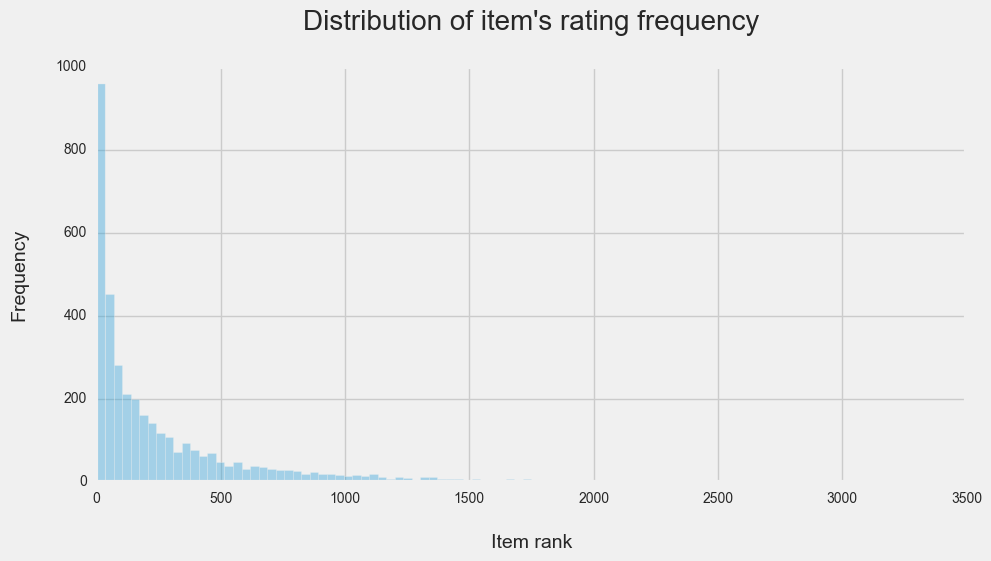

In [53]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(ratings_full.title.value_counts(), bins=100, kde=False)
ax.set_title('Distribution of item\'s rating frequency\n', size = 20)
ax.set_ylabel('Frequency\n', size = 14)
ax.set_xlabel('\nItem rank', size = 14)
plt.show()

We can see from the frequency of the different item's ratings above that some movies recieve considerable higher ratings than others.

From the MovieLens README file we know that all moview have recieved at least 20 ratings.

#### Most rated movies

In [54]:
ratings_full.title.value_counts()[:15]

American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Men in Black                                      2966
Alien                                             2949
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
The Matrix                                        2590
Back to the Future                                2583
The Silence of the Lambs                          2578
Raiders of the Lost Ark                           2514
Fargo                                             2513
The Sixth Sense                                   2459
Name: title, dtype: int64

#### Highest rated movies

In [55]:
# First use groupby on Title column and use agg method on Rating column applying size and mean functions
highest_rated = ratings_full.groupby('title').agg({'rating': [np.size, np.mean]})

# Sort new dataframe to see the highest scores
highest_rated.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                    size mean
title                        
Bittersweet Motel      1  5.0
One Little Indian      1  5.0
The Baby               1  5.0
Follow the Bitch       1  5.0
Smashing Time          2  5.0
Ulysses                1  5.0
Lured                  1  5.0
Brother of Sleep       1  5.0
Song of Freedom        1  5.0
I Am Cuba              5  4.8

These are movies that are not well known and they have recieved few ratings. 

I will look only at movies with at least 100 ratings.

In [56]:
# Sort dataframe to only include movies with ratings of 100 or more
highest_rated[highest_rated['rating']['size'] >= 100].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                           size      mean
title                                    
The Shawshank Redemption   2227  4.554558
The Godfather              2223  4.524966
A Close Shave               657  4.520548
The Usual Suspects         1783  4.517106
Schindler's List           2304  4.510417
The Wrong Trousers          882  4.507937
Sunset Boulevard            470  4.491489
Raiders of the Lost Ark    2514  4.477725
Rear Window                1050  4.476190
Paths of Glory              230  4.473913

This looks more realistic that the previous list and includes many well know movies.

#### Most rated genres

In [57]:
# Use CountVectorizer to split the genre column on |
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))

# Fit cv to the genre column in ratings_full
cv_genre = cv.fit_transform(ratings_full.genres).todense()

# Get feature names
columns = cv.get_feature_names()

# Create a dataframe of the genres
genre_dataframe = pd.DataFrame(cv_genre, columns = columns)
genre = genre_dataframe.sum().sort_values(ascending = False)
genre

comedy         356580
drama          354529
action         257457
thriller       189680
sci-fi         157294
romance        147523
adventure      133953
crime           79541
horror          76386
children's      72186
war             68527
animation       43293
musical         41533
mystery         40178
fantasy         36301
western         20683
film-noir       18261
documentary      7910
dtype: int64

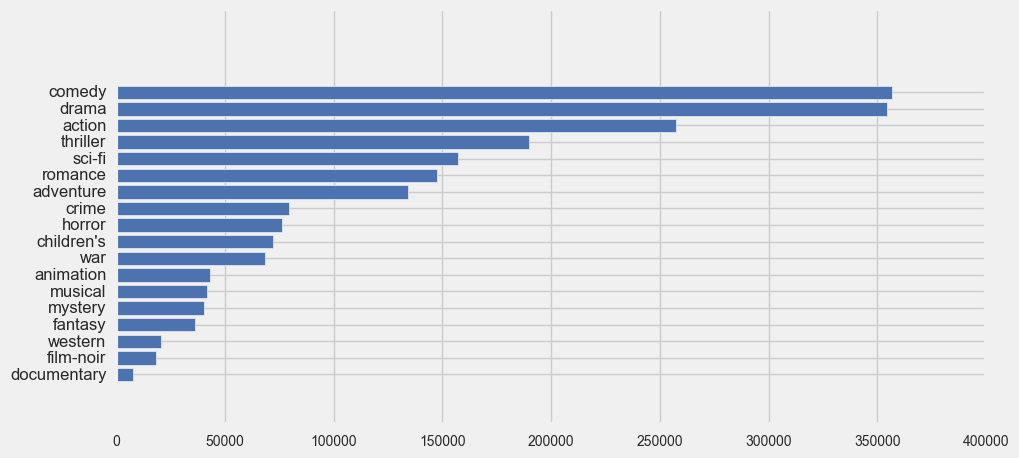

In [58]:
# Plot the genres in a barplot
ax = plt.figure(figsize = (10, 5))
ax = plt.barh(range(genre.shape[0]), genre, align='center')
ax = plt.yticks(range(genre.shape[0]), genre.index, rotation = 0, fontsize = 12)
ax = plt.gca().invert_yaxis()
plt.show()

We can see that- 

- Comedy and drama have the highest number of user ratings
- Documentary and film-noir have the lowest number of user ratings

### IMDb

#### Most common actors

In [59]:
# Use CountVectorizer to split the actors column on ', '
cv = CountVectorizer(strip_accents='unicode',tokenizer = lambda x: x.split(', '))

# Fit cv to the actors column in imdb
vect_data = cv.fit_transform(imdb.actors).todense()

# Get feature names
act_columns = [c for c in cv.get_feature_names()]

# Create a dataframe of the actors
actors_df = pd.DataFrame(vect_data, columns=act_columns)
actors = actors_df.sum().sort_values(ascending = False).head(15)
actors

robert de niro        27
gene hackman          24
whoopi goldberg       23
sean connery          23
bruce willis          22
demi moore            22
clint eastwood        22
christopher walken    21
sylvester stallone    21
robin williams        20
harvey keitel         20
samuel l. jackson     19
kevin costner         19
mel gibson            19
tom hanks             19
dtype: int64

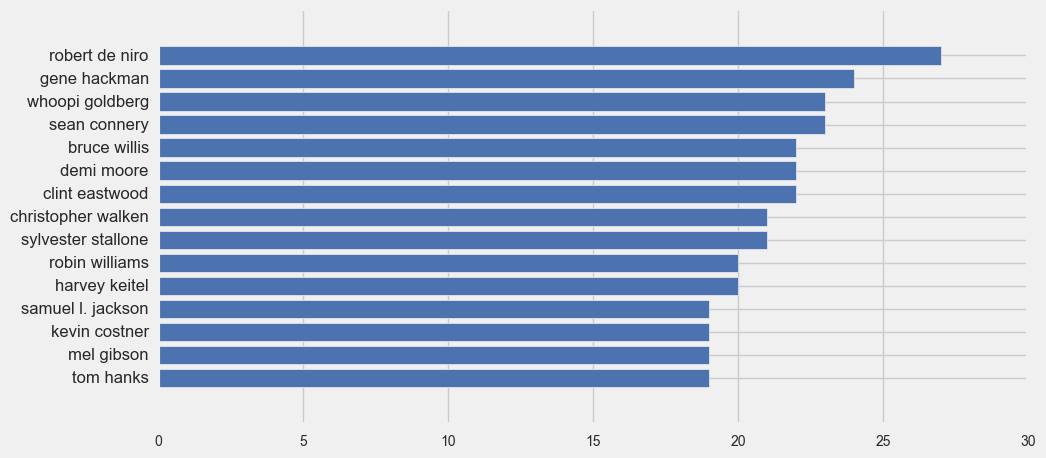

In [60]:
# Plot the actors in a barplot
plt.figure(figsize = (10, 5))
plt.barh(range(actors.shape[0]), actors, align='center')
plt.yticks(range(actors.shape[0]), actors.index, rotation = 0, fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

#### Most common directors

In [61]:
# Use CountVectorizer to split the directors column on ', '
cv = CountVectorizer(tokenizer = lambda x: x.split(', '))

# Fit cv to the directors column in imdb
vect_data = cv.fit_transform(imdb.director).todense()

# Get feature names
act_columns = [c for c in cv.get_feature_names()]

# Create a dataframe of the directors
directors_df = pd.DataFrame(vect_data, columns=act_columns)
directors_df = directors_df.drop('not listed', axis=1)
directors = directors_df.sum().sort_values(ascending = False).head(15)
directors

alfred hitchcock        49
woody allen             20
barry levinson          15
robert stevenson        14
steven spielberg        14
spike lee               14
richard donner          13
ron howard              13
kenneth branagh         13
clint eastwood          13
stanley kubrick         12
charles chaplin         12
john carpenter          12
francis ford coppola    11
martin scorsese         11
dtype: int64

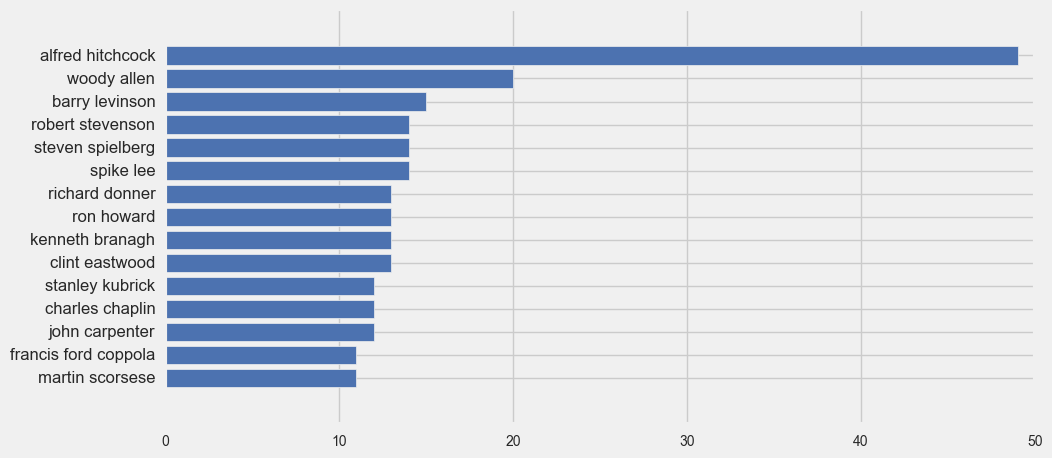

In [62]:
# Plot the directors in a barplot
plt.figure(figsize = (10, 5))
plt.barh(range(directors.shape[0]), directors, align='center')
plt.yticks(range(directors.shape[0]), directors.index, rotation = 0, fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

#### Top rated movies

In [63]:
top_movies = imdb[['title','imdb_rating']].sort_values('imdb_rating', ascending = False).head(15)
top_movies

,title,imdb_rating
315,The Shawshank Redemption,9.3
711,Wallace,9.3
847,The Godfather,9.2
1092,Prerokbe Ognja,9.0
1203,The Godfather: Part II,9.0
2520,Friends,9.0
2458,Westworld,9.0
523,Schindler's List,8.9
293,Pulp Fiction,8.9
1185,12 Angry Men,8.9


#### Top rated directors

In [64]:
top_directors = imdb[['director','imdb_rating']].sort_values('imdb_rating', ascending = False).head(15)
top_directors

,director,imdb_rating
315,Frank Darabont,9.3
711,Ian McCulloch,9.3
847,Francis Ford Coppola,9.2
1092,Michael Benson,9.0
1203,Francis Ford Coppola,9.0
2520,Not Listed,9.0
2458,Not Listed,9.0
523,Steven Spielberg,8.9
293,Quentin Tarantino,8.9
1185,Sidney Lumet,8.9


#### Movie runtimes

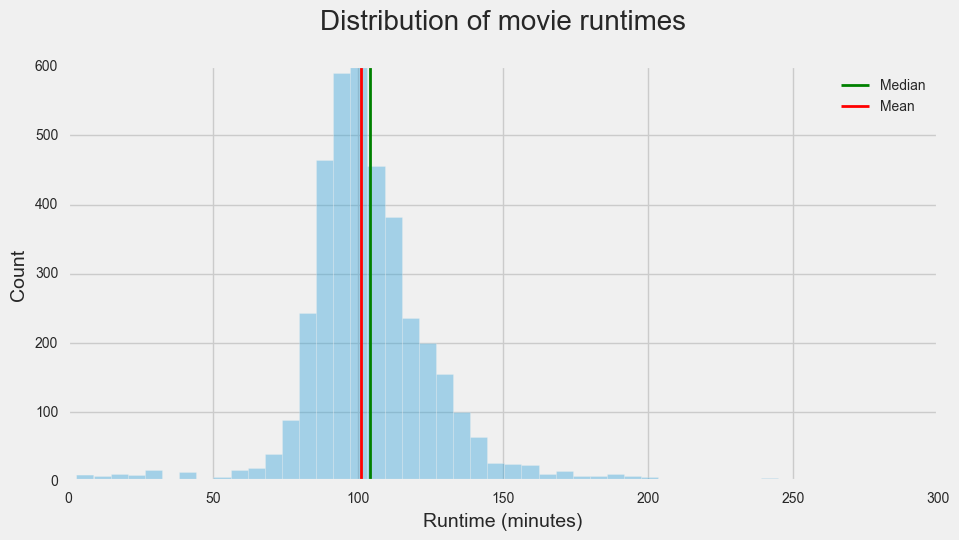

In [65]:
# Plot the distribution of runtimes
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(imdb.runtime, kde=False)
ax.set_title('Distribution of movie runtimes\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('Runtime (minutes)', size = 14)
ax.axvline(imdb.runtime.mean(), color = 'green', linewidth = 2)
ax.axvline(imdb.runtime.median(), color = 'red', linewidth = 2)
ax.legend(['Median', 'Mean'])
plt.show()

#### IMDb movie ratings

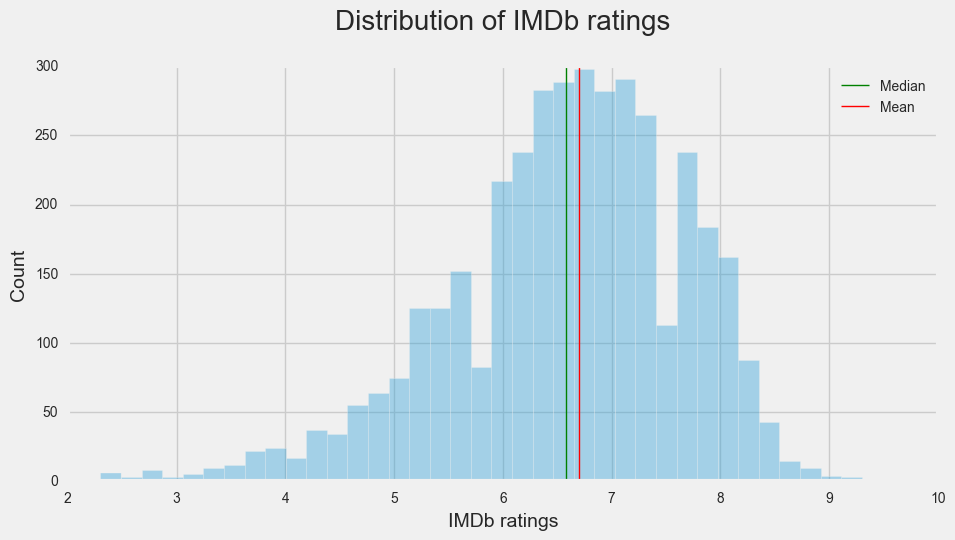

In [66]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(imdb.imdb_rating, kde=False)
ax.set_title('Distribution of IMDb ratings\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('IMDb ratings', size = 14)
ax.axvline(imdb.imdb_rating.mean(), color = 'green', linewidth = 1)
ax.axvline(imdb.imdb_rating.median(), color = 'red', linewidth = 1)
ax.legend(['Median', 'Mean'])
plt.show()

#### MovieLens movie ratings

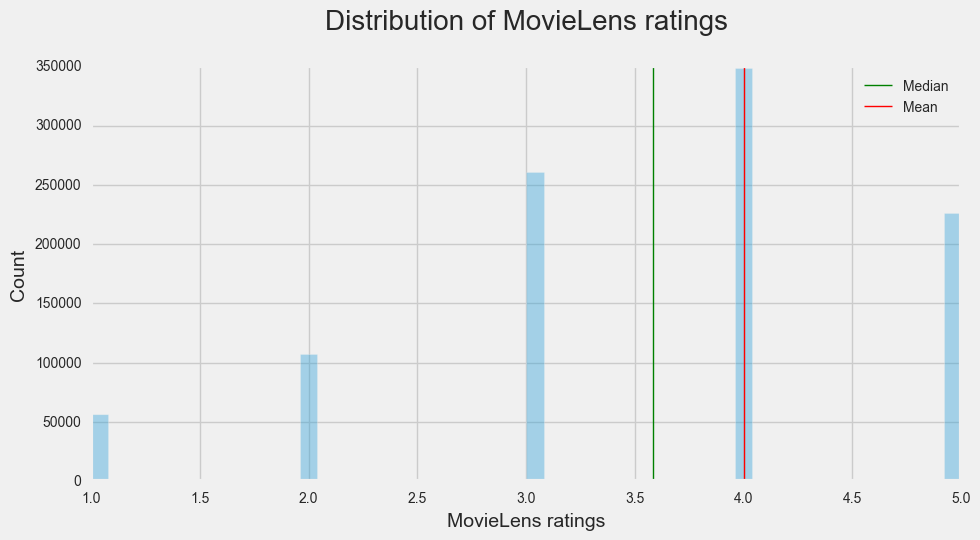

In [67]:
ax = plt.figure(figsize = (10, 5))
ax = sns.distplot(ratings_full.rating, kde=False)
ax.set_title('Distribution of MovieLens ratings\n', size = 20)
ax.set_ylabel('Count', size = 14)
ax.set_xlabel('MovieLens ratings', size = 14)
ax.axvline(ratings_full.rating.mean(), color = 'green', linewidth = 1)
ax.axvline(ratings_full.rating.median(), color = 'red', linewidth = 1)
ax.legend(['Median', 'Mean'])
plt.show()

### Data cleaning and exploratory data analysis summary

All relevant movie information needed for modelling has been sucessfully scraped from the OMDb API and saved as a new dataframe and in the Postgres SQL database.

The different dataframes were combined to add the IMDb data to the movies and ratings databases.

Looking at the different dataseta we are able to learn some interesting information - 

**Ratings**

We can see from the frequency of the different item's ratings that some movies recieve considerable higher ratings than others but from the dataset README file we know that all movies have at least 20 user ratings.

The distribution of the ratings frequency is in keeping with a Long Tail and is composed of a small number of popular movies in the head tail and the rest are located in the heavy tail, movies that are not well known or popular. We can expect that movie recommendations will be mostly from the head tail.

From the ratings dataset we were also able to determine the most rated movies which were all well know, polular movies. The five most rated movies were - 

- American Beauty                                   
- Star Wars: Episode IV - A New Hope                
- Star Wars: Episode V - The Empire Strikes Back    
- Men in Black                                      
- Alien  


**IMDb**

From the IMDb we were able to determine many interesting facts on the movie features. These included -  

Most common actors

- Robert de Niro
- Gene Hackman
- Whoopi Goldberg
- Sean Connery
- Clint Eastwood


Most common directors

- Alfred Hitchcock
- Woody Allen
- Barry Levinson
- Steven Spielberg
- Robert Stevenson


Top rated movies based on IMDb Score

- The Shawshank Redemption
- Wallace
- The Godfather
- The Godfather: Part II
- Westworld

Top rated directors based on IMDb Score

- Ian McCulloch
- Frank Darabont
- Francis Ford Coppola
- Michael Benson
- Steven Spielberg


As before, these are all well know actors, directors and films so there is no surprise that these are the results.

The average movie runtime, IMDb score and user rating were also calculated.

- Average movie runtime - 101 minutes
- Average IMDb score - 7.15
- Average user rating - 3.58

From this we can see that the average IMDb score and user rating are very similar once the user score is scaled up.

## Modelling

The two main types of recommender systems are **Collaborative** and **Content-Based** Filtering. 

- Collaborative filtering focuses on the similarity between different users and generates recommendations based on ratings previously made by users
- Content-based filtering focuses on the similarity of features for different items and generates recommendations based on these similarities

### Data cleaning

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from scipy.sparse.linalg import svds
from math import sqrt

For the modelling I am only interested in the ratings dataset, I will look at this in more detail.

In [71]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [72]:
# Count the number of ratings, unique users and movies
print 'There are', ratings.shape[0], 'ratings.'
print '\nThere are', len(ratings.userId.unique()), 'unique users.\n'
print 'There are', len(ratings.movieId.unique()), 'unique movies.'

There are 1000209 ratings.

There are 6040 unique users.

There are 3706 unique movies.


In [73]:
mu = ratings.rating.mean()

print 'The global mean rating is', mu

The global mean rating is 3.58156445303


We can see that the global mean rating is 3.58, I will be using this to help with calculating the baseline predictor accuracy.


Now let's look at the user and movie Ids in more detail.

In [74]:
print 'Min userId:\t', ratings.userId.min(), '\t\tMax userId:\t', ratings.userId.max()
print 'Min movieId:\t', ratings.movieId.min(), '\t\tMax movieId:\t', ratings.movieId.max()

Min userId:	1 		Max userId:	6040
Min movieId:	1 		Max movieId:	3952


The movie Ids range from 1 to 3952, this is more than the number or movies that have been rated. I will create a new column with the movieId reindexed in ascending order.

In [76]:
# Create a list of the movieIds and sort in ascending order
movies_list = list(ratings_full.movieId.unique())
movies_list.sort()

# Build a dictionary of the movies list
movie_dict = {}
x = 1
for i in movies_list:
    movie_dict[i] = x
    x += 1
    
# Create a list with the new redindexed movieIds
new_column = []
for i in ratings.movieId:
    new_column.append(movie_dict[i])
    
# Assign the list to a new column in the ratings dataframe
ratings['new_movieId'] = pd.Series(new_column)

# Lets look at the amended ratings dataframe
ratings.head()

,userId,movieId,rating,timestamp,new_movieId
0,1,1193,5,978300760,1105
1,1,661,3,978302109,640
2,1,914,3,978301968,854
3,1,3408,4,978300275,3178
4,1,2355,5,978824291,2163


We can see that the new column has been created with the newly created movie ids.

In [77]:
n_users = ratings.userId.max()
n_items = ratings.new_movieId.max()
print 'There are', n_users, 'users.'
print 'There are', n_items, 'items.'

There are 6040 users.
There are 3706 items.


We can confirm that there are 6040 users and 3706 items.

### Defining Training and Test Datasets

Using the train_test_split feature from the scikit-learn library I will split the dataset randomly into a training and testing dataset with a test size of 20%. I will use these datasets throughout the modelling (collaborative and content-based) to ensure consistancy in comparing the models.

In [78]:
train_data, test_data = train_test_split(ratings, test_size=0.2)

Let's look at the train and test set in more detail.

In [80]:
test_data.head()

,userId,movieId,rating,timestamp,new_movieId
249429,1503,2240,3,974763694,2051
143528,926,1513,5,1006643873,1395
943909,5692,337,3,958678574,328
587984,3589,3153,3,1019401721,2938
407681,2450,3418,4,974208296,3187


In [81]:
train_data.head()

,userId,movieId,rating,timestamp,new_movieId
371951,2173,785,3,974614215,743
332486,1962,1620,3,974759967,1488
384211,2244,1912,5,974596196,1733
4073,30,2762,4,978122035,2558
861141,5180,2202,5,961806046,2021


### Building User-Item Matrices

The majority of recommender systems consist of building a user-item matrix with some sort of "interaction" number in each cell. My first step will be to create user-item matrices for the training and test datasets.

As my matrices include numerical ratings that users give the items, it is referred to as an explicit feedback model.

I will start by creating matrices containing all zeroes, I can then easily map the user/item ID's to the user/item indices by removing the "Python starts at 0" offset between them. Although I am filling in the missing ratings as 0, I do not assume these values to truly be zero, they are just empty entries.

This is the reason for resetting the movie Ids in the previous section was to ensure the mapping could occur.

In [82]:
# Create a training matrix containing all zeros with dimensions of n_users, n_items
train_data_matrix = np.zeros((n_users, n_items))

# Assign the ratings from training dataset
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[5]-1] = line[3]

# Create a test matrix containing all zeros with dimensions of n_users, n_items    
    test_data_matrix = np.zeros((n_users, n_items))

# Assign the ratings from test dataset
for line in test_data.itertuples():
    
    test_data_matrix[line[1]-1, line[5]-1] = line[3]

### Sparcity

Before beginning the modelling I will look at the sparcity of the dataset.

In [83]:
sparsity = round(1.0-len(ratings)/float(n_users*n_items),3)

print 'The sparsity level of MovieLens1M is ' +  str(sparsity*100) + '%'

The sparsity level of MovieLens1M is 95.5%


As previously comfirmed, every user has rated at least 20 movies, this results in a sparcity of 95.5%.

This means that 95.5% of the user-items ratings don't have a value or in this case have a rating of 0.

### Baseline

The baseline model is measured using $\hat{r}_{xi}^{base} = \mu + b_{x} + b_{i}$ to estimate the by user x for item i.

- $\mu$ = the global mean rating

- $b_{x}$ = (the average rating for user x) - $\mu$

- $b_{i}$ = (the average rating fir item i) - $\mu$  

All future models will reference back to this baseline for comparison.

We need to determine the user/movie biases for measuring the basline. 

I will do this by getting the average rating for each user/movie and subtracting the global mean rating, identified previously as ~ 3.58.

The user and movie biases qill be saved to lists for use further on.

In [84]:
user_bias = np.true_divide(train_data_matrix.sum(1),(train_data_matrix!=0).sum(1)) - mu
movie_bias = np.true_divide(train_data_matrix.sum(0),(train_data_matrix!=0).sum(0)) - mu

There can be no nan values in the lists, if any exist these will be removed.

In [85]:
user_bias = np.nan_to_num(user_bias)
movie_bias = np.nan_to_num(movie_bias)

Next I will create a matrix of all zeros then I can easily map the user/item baseline ratings.

In [86]:
baseline_matrix = np.zeros((n_users, n_items))

for x in range(n_users): 
    
    for y in range(n_items):
        
        baseline_matrix[x, y] = mu + user_bias[x] + movie_bias[y]

In [87]:
# Check to see if there are any nan values in the baseline matrix
np.isnan(baseline_matrix).any()

False

As the ratings are only from the MovieLens ratings dataset are only from 1-5 I will need to adjust the baseline ratings accordingly.

- If any values are less than 1 then they will be converted to a rating of 1
- If any values are greater than 5 they will be converted to 5

In [88]:
baseline_matrix[baseline_matrix > 5] = 5
baseline_matrix[baseline_matrix < 1] = 1

We can preview the matrix below.

In [89]:
print baseline_matrix[:6,:6]

[[ 4.84111487  3.88594892  3.64916471  3.3988619   3.75104872  4.55319964]
 [ 4.19111487  3.23594892  2.99916471  2.7488619   3.10104872  3.90319964]
 [ 4.42325773  3.46809177  3.23130757  2.98100476  3.33319157  4.13534249]
 [ 4.88190435  3.92673839  3.68995419  3.43965138  3.79183819  4.59398911]
 [ 3.75966326  2.8044973   2.5677131   2.31741029  2.6695971   3.47174802]
 [ 4.4876835   3.53251754  3.29573334  3.04543053  3.39761734  4.19976826]]


I need to define a function for measuring the Root Mean Square Error (RMSE), this will be used to evaluate the accuracy of all models.

In [90]:
from sklearn.metrics import mean_squared_error

def rmse(prediction, test):
    
    prediction = prediction[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    
    return sqrt(mean_squared_error(prediction, test))

I will determine the RMSE of the baseline accuracy against the training dataset.

In [91]:
print 'The baseline predictor RMSE:',rmse(train_data_matrix, baseline_matrix)

The baseline predictor RMSE: 3.39268595203


I will create a dictionary to record the RMSE for the different models.

In [92]:
RMSE = {}

RMSE['Baseline'] = rmse(train_data_matrix, baseline_matrix)

### Collaborative filtering

Initially I will focus on collaborative filtering models, the data will be split into two clases -  user based and item based. In either scenario, a similarity matrix will be built. 

For user based collaborative filtering, the similarity matrix will consist of the cosine distance between any two pairs of users. Likewise, the item based similarity matrix will measure the cosine distance between any two pairs of items.

#### Simple cosine similarity

Cosine distance is a common distance metric in collaborative filtering. The similarity between user/items is measured as the cosine of the angle between two user/item vectors.

The cosine similarity ranges from 0 to 1 as there are no negative ratings. The similarity matrices are symmetric and have ones along the diagonal.

First I will define a function to create the similarity matrices for items and users.

In [93]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon is a small number for handling any divided-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    
    norms = np.array([np.sqrt(np.diagonal(sim))])
    
    return (sim / norms / norms.T)

Next I will create the user and item similarity matrices using the similarity function.

In [94]:
user_similarity = similarity(train_data_matrix, kind='user')
item_similarity = similarity(train_data_matrix, kind='item')


We can preview the matrices below.

In [95]:
print user_similarity[:4, :4]
print item_similarity[:4, :4]

[[ 1.          0.02764688  0.07775594  0.0381987 ]
 [ 0.02764688  1.          0.11104361  0.12683278]
 [ 0.07775594  0.11104361  1.          0.14156936]
 [ 0.0381987   0.12683278  0.14156936  1.        ]]
[[ 1.          0.30670203  0.21980091  0.14716166]
 [ 0.30670203  1.          0.18360066  0.13288332]
 [ 0.21980091  0.18360066  1.          0.15333277]
 [ 0.14716166  0.13288332  0.15333277  1.        ]]


As mentioned, we can see that the similarity matrices are symmetric and have ones along the diagonal.

Next I will define a function to use the similarity matrices to predict the unrated values, these predictions will then be compared against the test data matrix to determine the accuracy using RMSE.

In [96]:
def predict(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'item':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

I will use the function to calculate the user and item predictions then evaluate the accuracy.

In [101]:
item_prediction = predict(train_data_matrix, item_similarity, kind='item')
user_prediction = predict(train_data_matrix, user_similarity, kind='user')

# Adjust the ratings
item_prediction[item_prediction > 5] = 5
item_prediction[item_prediction < 1] = 1
user_prediction[user_prediction > 5] = 5
user_prediction[user_prediction < 1] = 1

RMSE['User-based CF'] = rmse(user_prediction, test_data_matrix)
RMSE['Item-based CF'] = rmse(item_prediction, test_data_matrix)

print 'User-based RMSE: ', RMSE['User-based CF']
print 'Item-based RMSE: ', RMSE['Item-based CF']

User-based RMSE:  2.73813009364
Item-based RMSE:  2.78976330447


##### Summary

Looking at the RMSE for both user and item based similarity we can see a slight improvement in the RMSE over the baseline.

I will try to refine my model further focusing on the the top users/items.

### Top k Collaborative Filtering

I will attempt to improve the accuracy of my model by considering the top k users/items who are most similar to the target user/item. 

I will define the function first.

In [102]:
def k_predict(ratings, similarity, kind='user', k=30):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in xrange(ratings.shape[0]):
            k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in xrange(ratings.shape[1]):
                pred[i, j] = similarity[i, :][k_users].dot(ratings[:, j][k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][k_users]))
    if kind == 'item':
        for j in xrange(ratings.shape[1]):
            k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in xrange(ratings.shape[0]):
                pred[i, j] = similarity[j, :][k_items].dot(ratings[i, :][k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][k_items]))        
    
    return pred

To determine the optimal k value for reducing the RMSE I will determine the RMSE ovr a range of k values from 5 to 80.

Once the RMSE scores are calculated I will visualise the results to understand which k values produce the most accurate RMSE scores for items and users.

In [103]:
k_array = [5, 20, 35, 50, 65, 80, 95]

user_train_rmse = []
user_test_rmse = []
item_test_rmse = []
item_train_rmse = []

for k in k_array:
    
    user_pred = k_predict(train_data_matrix, user_similarity, kind='user', k=k)
    item_pred = k_predict(train_data_matrix, item_similarity, kind='item', k=k)
    
    # Adjust the ratings
    item_pred[item_pred > 5] = 5
    item_pred[item_pred < 1] = 1
    user_pred[user_pred > 5] = 5
    user_pred[user_pred < 1] = 1
    
    user_train_rmse += [rmse(user_pred, train_data_matrix)]
    user_test_rmse += [rmse(user_pred, test_data_matrix)]
    
    item_train_rmse += [rmse(item_pred, train_data_matrix)]
    item_test_rmse += [rmse(item_pred, test_data_matrix)]

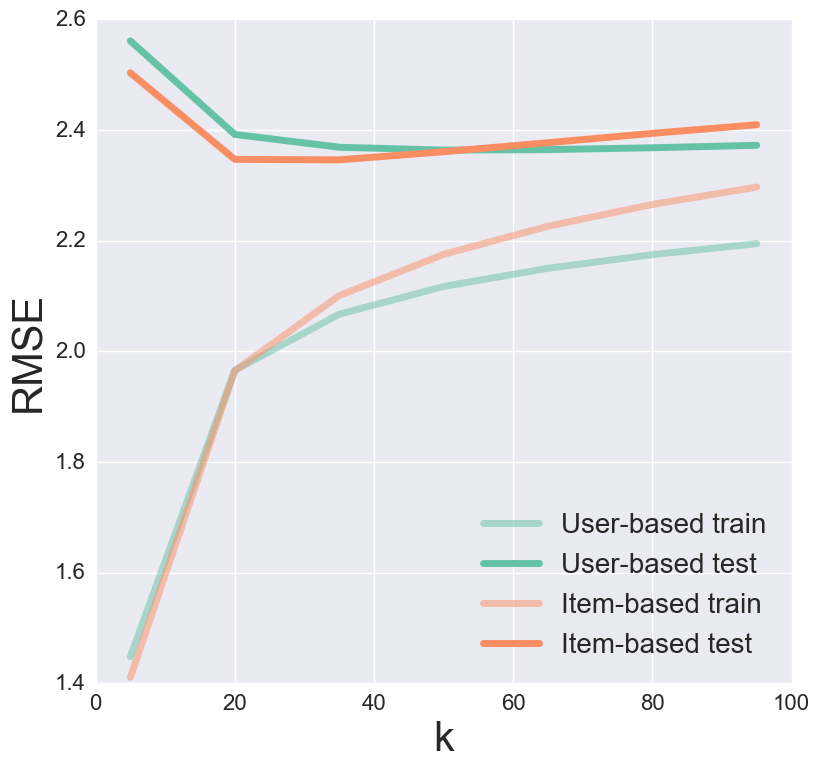

In [104]:
sns.set()
pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_rmse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_rmse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_rmse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_rmse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('RMSE', fontsize=30);

##### Summary

From the graph I can see that for item based similarity a k value of 35 produces the lowest RMSE and for user based a k value of 65 produces the lowest RMSE.

Using these values I will save the results and display them.

In [105]:
k_item_prediction = k_predict(train_data_matrix, item_similarity, kind='item', k=35)

# Adjust the ratings
k_item_prediction[k_item_prediction > 5] = 5
k_item_prediction[k_item_prediction < 1] = 1
RMSE['Item-based k35'] = rmse(k_item_prediction, test_data_matrix)
print 'k_item-based RMSE: ', RMSE['Item-based k35']

k_user_prediction = k_predict(train_data_matrix, user_similarity, kind='user', k=65)

# Adjust the ratings
k_user_prediction[k_user_prediction > 5] = 5
k_user_prediction[k_user_prediction < 1] = 1
RMSE['User-based k65'] = rmse(k_user_prediction, test_data_matrix)
print 'k_user-based RMSE: ', RMSE['User-based k65']

k_item-based RMSE:  2.34605495
k_user-based RMSE:  2.36455579806


The RMSE has been reduced further for both users and items.

### Collaborative Filtering (no Bias)

In [106]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
        pred += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        pred += item_bias[np.newaxis, :]
        
    return pred

In [107]:
user_pred = predict_nobias(train_data_matrix, user_similarity, kind='user')

# Adjust the ratings
user_pred[user_pred > 5] = 5
user_pred[user_pred < 1] = 1
print 'User-based CF RMSE with bias subtracted: ' + str(rmse(user_pred, test_data_matrix))

item_pred = predict_nobias(train_data_matrix, item_similarity, kind='item')

# Adjust the ratings
item_pred[item_pred > 5] = 5
item_pred[item_pred < 1] = 1
print 'Item-based CF RMSE with bias subtracted: ' + str(rmse(item_pred, test_data_matrix))

User-based CF RMSE with bias subtracted: 2.7175389066
Item-based CF RMSE with bias subtracted: 2.72843212499


#### Top k

In [108]:
def predict_topk_nobias(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        ratings = (ratings - user_bias[:, np.newaxis]).copy()
        for i in xrange(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in xrange(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
        pred += user_bias[:, np.newaxis]
    if kind == 'item':
        item_bias = ratings.mean(axis=0)
        ratings = (ratings - item_bias[np.newaxis, :]).copy()
        for j in xrange(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in xrange(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items])) 
        pred += item_bias[np.newaxis, :]
        
    return pred

In [109]:
k_array = [5, 20, 35, 50, 65, 80, 95]
user_train_rmse = []
user_test_rmse = []
item_test_rmse = []
item_train_rmse = []

for k in k_array:
    user_pred = predict_topk_nobias(train_data_matrix, user_similarity, kind='user', k=k)
    item_pred = predict_topk_nobias(train_data_matrix, item_similarity, kind='item', k=k)
    
    # Adjust the ratings
    item_pred[item_pred > 5] = 5
    item_pred[item_pred < 1] = 1
    user_pred[user_pred > 5] = 5
    user_pred[user_pred < 1] = 1
    
    user_train_rmse += [rmse(user_pred, train_data_matrix)]
    user_test_rmse += [rmse(user_pred, test_data_matrix)]
    
    item_train_rmse += [rmse(item_pred, train_data_matrix)]
    item_test_rmse += [rmse(item_pred, test_data_matrix)]

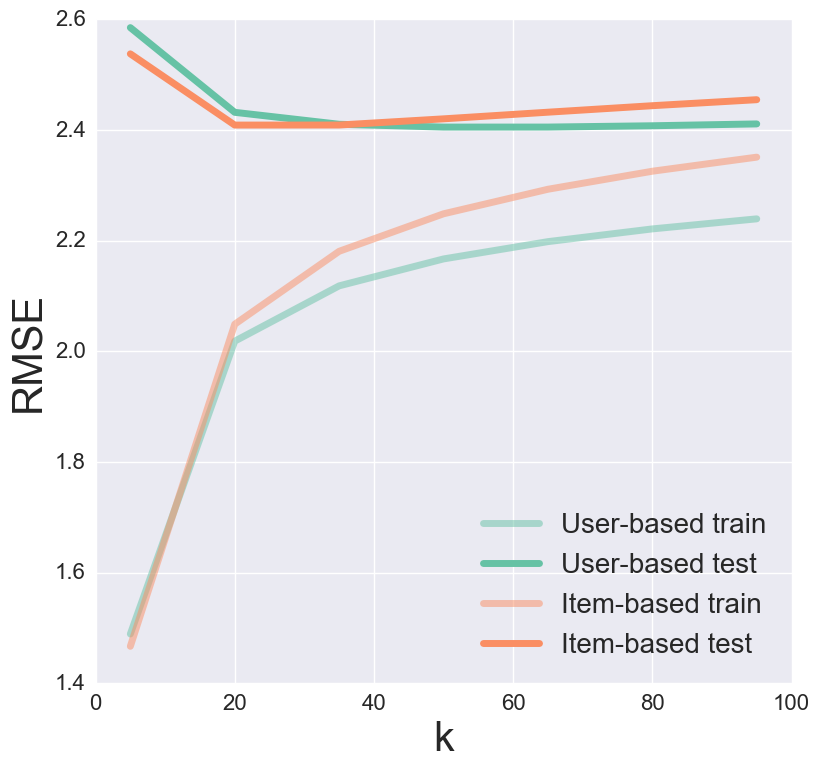

In [110]:
sns.set()
pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_rmse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_rmse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_rmse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_rmse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('RMSE', fontsize=30);

In [111]:
k_item_prediction = predict_topk_nobias(train_data_matrix, item_similarity, kind='item', k=35)

# Adjust the ratings
k_item_prediction[k_item_prediction > 5] = 5
k_item_prediction[k_item_prediction < 1] = 1
RMSE['Item-based k35 with bias subtracted'] = rmse(k_item_prediction, test_data_matrix)
print 'k_item-based RMSE with bias subtracted: ', RMSE['Item-based k35 with bias subtracted']

k_user_prediction = predict_topk_nobias(train_data_matrix, user_similarity, kind='user', k=60)

# Adjust the ratings
k_user_prediction[k_user_prediction > 5] = 5
k_user_prediction[k_user_prediction < 1] = 1
RMSE['User-based k60 with bias subtracted'] = rmse(k_user_prediction, test_data_matrix)
print 'k_user-based RMSE with bias subtracted: ', RMSE['User-based k60 with bias subtracted']

k_item-based RMSE with bias subtracted:  2.40899351943
k_user-based RMSE with bias subtracted:  2.40501933719


### Single Value Decomposition

Singular value decomposition (SVD) is a well-known matrix factorization method and collaborative filtering can be formulated by approximating a matrix XX by using SVD. 

The winning team of the Netflix Prize competition used SVD matrix factorization models to produce their recommendations.

In [112]:
user_ratings_mean = np.mean(train_data_matrix, axis = 1)
R_demeaned = train_data_matrix - user_ratings_mean.reshape(-1, 1)

In [113]:
u, s, vt = svds(train_data_matrix, k=25)

s_diag_matrix = np.diag(s)
pred = np.dot(np.dot(u, s_diag_matrix), vt)

# Adjust the ratings
pred[pred > 5] = 5
pred[pred < 1] = 1

RMSE['SVD'] = rmse(pred, test_data_matrix)
print 'SVD RMSE:', RMSE['SVD']

SVD RMSE: 2.42336488239


##### Summary

The RMSE is less than that of the Baseline but not the lowest RMSE of all the models.

#### Results

I evaluated each model by it's test RMSE. The results are visualised in the graph below. 

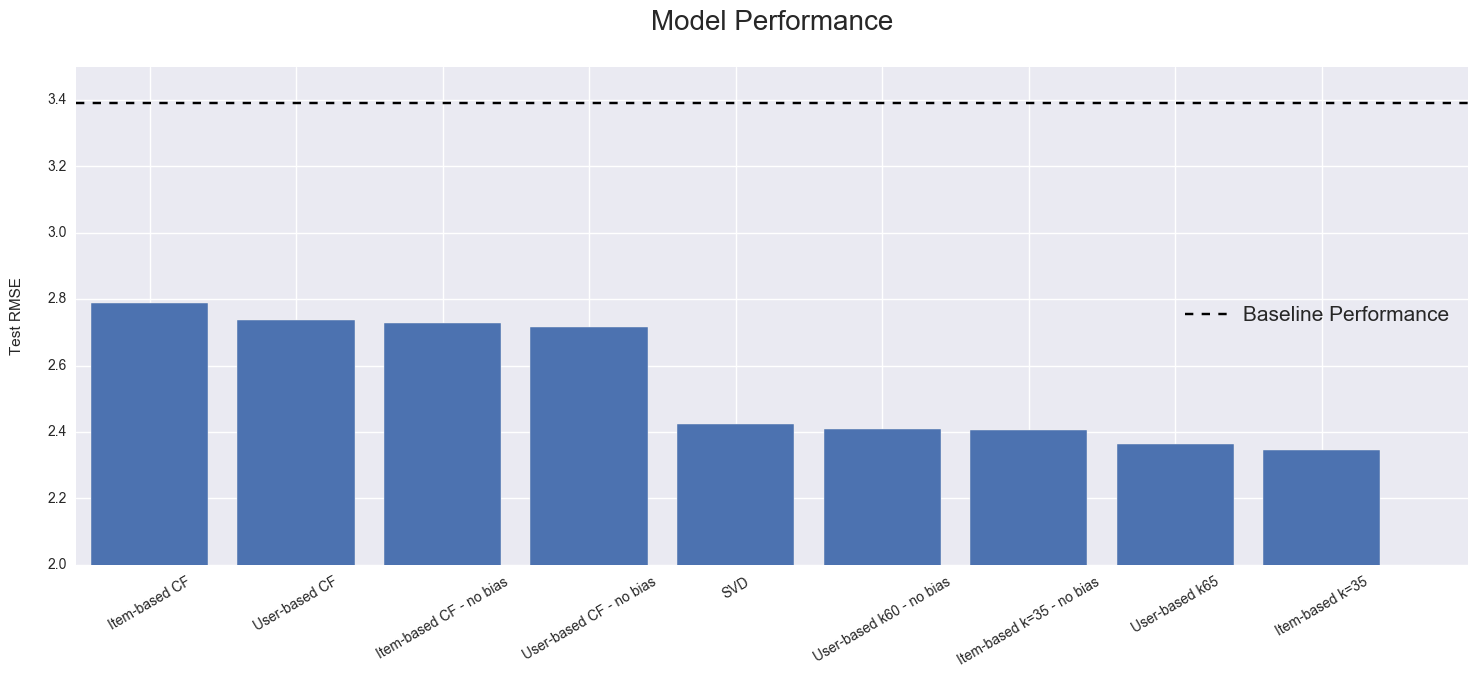

In [179]:
models = ['User-based CF', 'Item-based CF', 'Item-based k=35', 'User-based k65', 'SVD', 
          'User-based CF - no bias', 'Item-based CF - no bias', 'Item-based k=35 - no bias', 'User-based k60 - no bias']
RMSE = [2.738, 2.789, 2.346, 2.364, 2.423, 2.717, 2.728, 2.405, 2.408]

importances = np.array(RMSE)  
indices = np.argsort(importances)[::-1]

# Plot model performance
plt.figure(figsize = (16, 6))
plt.title("Model Performance\n", fontsize = 20)
plt.axhline(3.392, color = 'k', linestyle = '--', label = 'Baseline Performance')
plt.bar(range(len(models)), importances[indices], align="center")
plt.ylabel('Test RMSE\n')
plt.ylim(2, 3.5)
plt.xticks(range(len(models)), np.array(models)[indices], rotation=30)
plt.xlim([-0.5, len(models)])
plt.legend(loc = 'best', fontsize = 15)
plt.show()

From the graph we can see that all models improve over baseline model. The user and item colaborative models don't perform as well as the other models. The tem-based model, using top 35 items who are most similar to the target item, achieves the lowest RMSE among all other models.


|Model    | RMSE    | % improvement    |
|------ | ------|
|Baseline    | 3.392   | -    |
|Item-based CF    | 2.789   | 17.77%    |
|User-baser CF    | 2.738   | 19.28%    |
|Item-based CF - no bias   | 2.728   | 19.57%    |
|User-baser CF - no bias   | 2.717   | 19.89%    |
|SVD    |  2.423  | 28.56%    |
|User-based k=60 - no bias   |  2.408  | 29%    |
|Item-based k=35 - no bias   |  2.405  | 29.09%    |
|User-based k=65    | 2.364   | 30.30%    |
|Item-based k=35    | 2.346   | 30.83%    |


The quality of recommendation would likely improve if users rated more movies.

### Content Based Filtering

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS

In [116]:
movies_df = ratings_full
movies_df.drop_duplicates(subset='movieId', keep='first', inplace=True)
movies_df.Plot.replace(np.nan, 'Not Listed', inplace=True)
movies_df.actors.replace(np.nan, 'Not Listed', inplace=True)
movies_df.director.replace(np.nan, 'Not Listed', inplace=True)

#### Movie Features

In [117]:
# First sort the dataframe by the MovieID in ascending order
movies_df.sort_values(by='movieId', inplace=True)

In [118]:
# Let's look at the movie features
movies_df.head()

,movieId,genres,year,title,Plot,actors,director,runtime,cert,imdb_rating,imdb_id,poster,userId,rating,timestamp
0,1,Animation|Children's|Comedy,1995,Toy Story,A cowboy doll is profoundly threatened and jea...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",John Lasseter,81,G,8.3,tt0114709,https://images-na.ssl-images-amazon.com/images...,1,5,978824268
2077,2,Adventure|Children's|Fantasy,1995,Jumanji,When two kids find and play a magical board ga...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston,104,PG,6.9,tt0113497,https://images-na.ssl-images-amazon.com/images...,10,5,979168267
2778,3,Comedy|Romance,1995,Grumpier Old Men,John and Max resolve to save their beloved bai...,"Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",Howard Deutch,101,PG-13,6.6,tt0113228,https://images-na.ssl-images-amazon.com/images...,26,2,978140022
3256,4,Comedy|Drama,1995,Waiting to Exhale,"Based on Terry McMillan's novel, this film fol...","Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker,124,R,5.7,tt0114885,https://images-na.ssl-images-amazon.com/images...,8,3,978232203
3426,5,Comedy,1995,Father of the Bride Part II,George Banks must deal not only with the pregn...,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer,106,PG,5.9,tt0113041,https://images-na.ssl-images-amazon.com/images...,26,5,978144881


The features we are interested in Genres, Year, Actors and Directors.

Next I will create dummy variables for each of the features.

##### Actors

In [119]:
# Use CountVectoriser to creata a dataframe of the actor dummies
cv = CountVectorizer(tokenizer=lambda x: x.split(', '))
actors = cv.fit_transform(movies_df['actors']).todense()
actor_dummies = pd.DataFrame(actors, columns = cv.get_feature_names())

# Remove actors that are not listed
actor_dummies.drop('not listed', axis=1, inplace=True)

In [120]:
# Let's look at the actor dummies
actor_dummies.head()

,7 year bitch,a. michael baldwin,a.j. langer,aaliyah,aaron douglas,aaron eckhart,aaron shields,aaron stanford,aaron taylor-johnson,aaron tveit,...,zoë wanamaker,àlex casanovas,álex angulo,ángela molina,ángela sepúlveda,élodie bouchez,émile genest,émilie dequenne,éva igó,özgü namal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Determine the top actors and save as a string
name =  actor_dummies.sum().sort_values(ascending = False).head(200).index
value = actor_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(name, value):
    d[n] = v

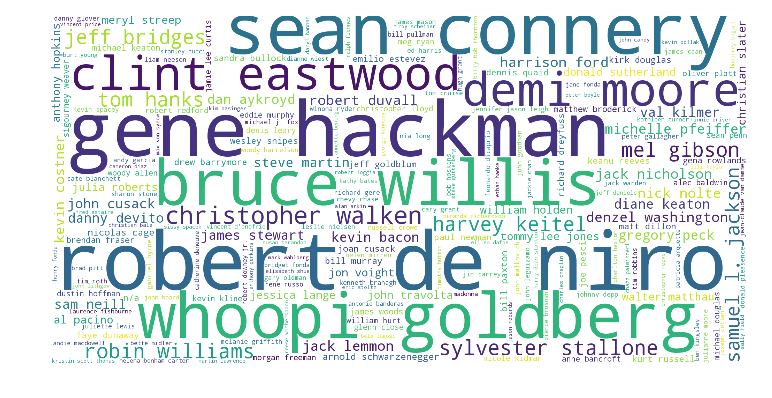

In [122]:
# Display the top actors in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Directors

In [123]:
# Use CountVectoriser to creata a dataframe of the actor dummies
cv = CountVectorizer(tokenizer=lambda x: x.split(', '))
directors = cv.fit_transform(movies_df['director']).todense()
director_dummies = pd.DataFrame(directors, columns = cv.get_feature_names())

# Remove directors that are not listed
director_dummies.drop('not listed', axis=1, inplace=True)

In [124]:
# Let's look at the actor dummies
director_dummies.head()

,aaron kim johnston,aaron norris,aaron speiser,abbas kiarostami,abbe wool,abdullah oguz,abel ferrara,abraham polonsky,adam abraham,adam bernstein,...,yvan le moine,yvette kaplan,zalman king,ziad doueiri,zoe r. cassavetes,àlex pastor,álex de la iglesia,ángel muñiz,åke sandgren,éric rohmer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
# Determine the top directors and save as a string
name =  director_dummies.sum().sort_values(ascending = False).head(200).index
value = director_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(name, value):
    d[n] = v

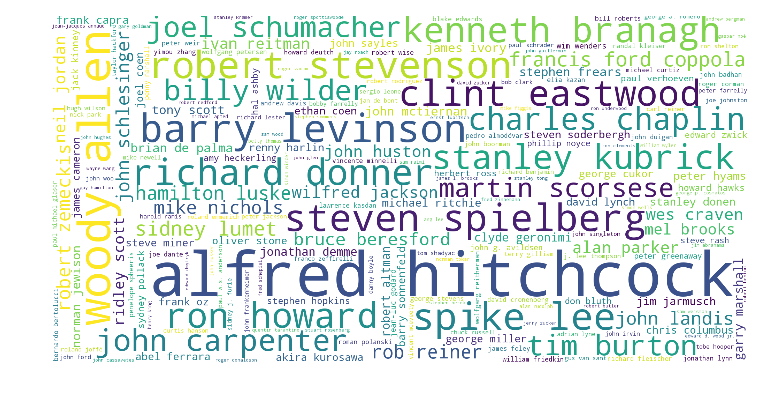

In [126]:
# Display the top directors in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Genres

In [127]:
genre_dummies = movies_df.genres.str.get_dummies()

# Let's look at the genre dummies
genre_dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2077,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2778,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3256,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# Determine the  top genres and save as a string
genre =  genre_dummies.sum().sort_values(ascending = False).head(200).index
value = genre_dummies.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(genre, value):
    d[n] = v

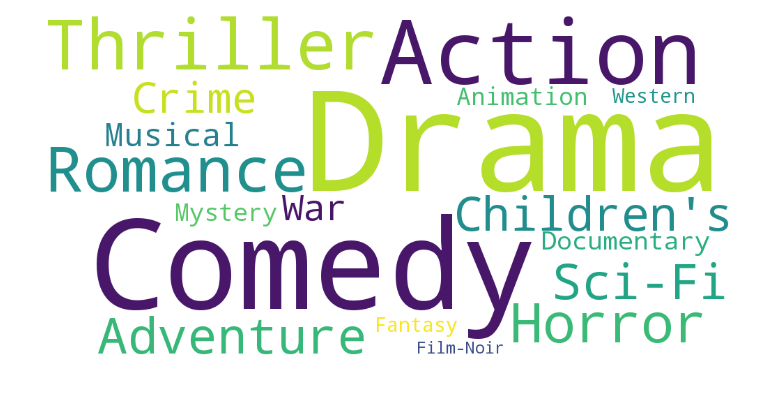

In [129]:
# Display the top genres in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=1000,
                          height=500, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Year

In [130]:
# Convert series from an integer to a string
movies_df['year'] = movies_df.year.astype(str)

# Create the dummies
year_dummies = movies_df.year.str.get_dummies()

In [131]:
# Let's look at the genre dummies
year_dummies.head()

,1600,1900,1919,1920,1921,1922,1923,1925,1926,1927,...,1996,1997,1998,1999,2000,2001,2010,3000,8230,9000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# Drop the unwanted columns in final_df
movies_df.drop(['Plot', 'actors', 'director', 
               'runtime', 'cert', 'imdb_rating', 'title', 'movieId', 'poster'], axis=1, inplace=True)

# Reset the indices of the dummy features
movies_df.reset_index(drop=True, inplace=True)
actor_dummies.reset_index(drop=True, inplace=True)
director_dummies.reset_index(drop=True, inplace=True)
genre_dummies.reset_index(drop=True, inplace=True)
year_dummies.reset_index(drop=True, inplace=True)

Next I will create several dataframes with the different features in each.

In [133]:
# Actors, directors, genre, year
feat_1 = pd.concat([actor_dummies, director_dummies, genre_dummies, year_dummies], axis=1, ignore_index=True)

# Actors, directors, genre
feat_2 = pd.concat([actor_dummies, director_dummies, genre_dummies], axis=1, ignore_index=True)

# Actors, genre, year
feat_3 = pd.concat([actor_dummies, genre_dummies, year_dummies], axis=1, ignore_index=True)

# Directors, genre, year
feat_4 = pd.concat([director_dummies, genre_dummies, year_dummies], axis=1, ignore_index=True)

##### Similarity

Again, I will use cosine similarity between items to measure the angle between two item vectors.

The cosine similarity ranges from 0 to 1 as there are no negative ratings. The similarity matrices are symmetric and have ones along the diagonal.

I will use the CosineSimilarity from sklearn.

In [134]:
cosine_1 = cosine_similarity(feat_1, feat_1)
cosine_2 = cosine_similarity(feat_2, feat_2)
cosine_3 = cosine_similarity(feat_3, feat_3)
cosine_4 = cosine_similarity(feat_4, feat_4)

In [136]:
# Make predictions using the predict function defined earlier

item_prediction_1 = predict(train_data_matrix, cosine_1, kind='item')
# Adjust the ratings
item_prediction_1[item_prediction_1 > 5] = 5
item_prediction_1[item_prediction_1 < 1] = 1
item_prediction_2 = predict(train_data_matrix, cosine_2, kind='item')
# Adjust the ratings
item_prediction_2[item_prediction_2 > 5] = 5
item_prediction_2[item_prediction_2 < 1] = 1
item_prediction_3 = predict(train_data_matrix, cosine_3, kind='item')
# Adjust the ratings
item_prediction_3[item_prediction_3 > 5] = 5
item_prediction_3[item_prediction_3 < 1] = 1
item_prediction_4 = predict(train_data_matrix, cosine_4, kind='item')
# Adjust the ratings
item_prediction_4[item_prediction_4 > 5] = 5
item_prediction_4[item_prediction_4 < 1] = 1

In [137]:
print 'Feature-based RMSE 1: ', rmse(item_prediction_1, test_data_matrix)
print 'Feature-based RMSE 2: ', rmse(item_prediction_2, test_data_matrix)
print 'Feature-based RMSE 3: ', rmse(item_prediction_3, test_data_matrix)
print 'Feature-based RMSE 4: ', rmse(item_prediction_4, test_data_matrix)

Feature-based RMSE 1:  2.80343203454
Feature-based RMSE 2:  2.80077034731
Feature-based RMSE 3:  2.80349662578
Feature-based RMSE 4:  2.80380212909


##### Summary

The best RMSE was for actors, directors, genre.

With an RMSE of 2.8 this is below the Baseline.

#### Movie Descriptions

In [142]:
# Redefine the ratings_full dataset
movies_plot = ratings_full
movies_plot.drop_duplicates(subset='movieId', keep='first', inplace=True)

In [143]:
# Define the model to determing the feature importance of the movie plots
tf = TfidfVectorizer(analyzer='word',
                             ngram_range=(1, 2),
                             min_df=0,
                             stop_words='english')

# Fit the model to the movie plots
tfidf_matrix = tf.fit_transform(movies_plot['Plot'])

In [144]:
# Convert to a dataframe and use the feature names as column labels
plot_words_df = pd.DataFrame(tfidf_matrix.todense(), columns=tf.get_feature_names())

# Remove plots that are not listed
plot_words_df.drop('listed', axis=1, inplace=True)

In [145]:
# Let's look at the dataframe
plot_words_df.head()

,000,000 000,000 counterfeiter,000 deutschmarks,000 employer,000 fans,000 feet,000 girl,000 impersonates,000 miles,...,zorro,zorro pursues,zorro restores,zulu,zulu best,zulu spent,zé,zé carioca,óof,óof certain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Determine the  top genres and save as a string
word =  plot_words_df.sum().sort_values(ascending = False).head(200).index
value = plot_words_df.sum().sort_values(ascending = False).head(200)

d = {}

for n, v in zip(word, value):
    d[n] = v

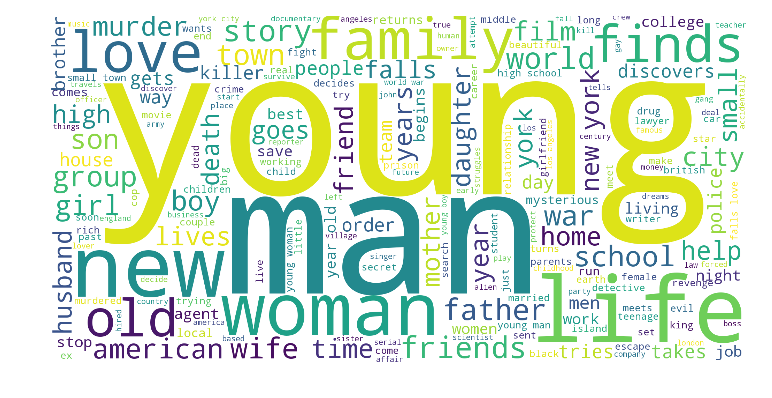

In [147]:
# Display the top genres in a word cloud
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1000, 
                         ).generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### Similarity

In [148]:
cosine_plot = cosine_similarity(plot_words_df, plot_words_df)

In [151]:
# Make predictions
item_prediction_plot = predict(train_data_matrix, cosine_plot, kind='item')

# Adjust the ratings
item_prediction_plot[item_prediction_plot > 5] = 5
item_prediction_plot[item_prediction_plot < 1] = 1

In [152]:
print 'Plot-based RMSE: ', rmse(item_prediction_plot, test_data_matrix)

Plot-based RMSE:  2.81083781061


##### Summary

The RMSE for the plot words is fractionally greater that for the features in previous section and also below the baseline the Baseline.

#### Combined Features and Plot

In [153]:
# Create a new dataframe with the movie features and plot words
combined_df = pd.concat([plot_words_df, feat_2], axis=1)

In [154]:
# Measuring the similarity
cosine_combined = cosine_similarity(combined_df, combined_df)

In [155]:
# Make predictions
item_prediction_combined = predict(train_data_matrix, cosine_combined, kind='item')
# Adjust the ratings
item_prediction_combined[item_prediction_combined > 5] = 5
item_prediction_combined[item_prediction_combined < 1] = 1

In [156]:
print 'Combined-based RMSE: ', rmse(item_prediction_combined, test_data_matrix)

Combined-based RMSE:  2.80111946258


##### Summary

This model performs almost equal to movie features with actors, directors and genres with an RMSE of 2.801

### Results

After evaluating each model by it's test RMSE, we can see that -

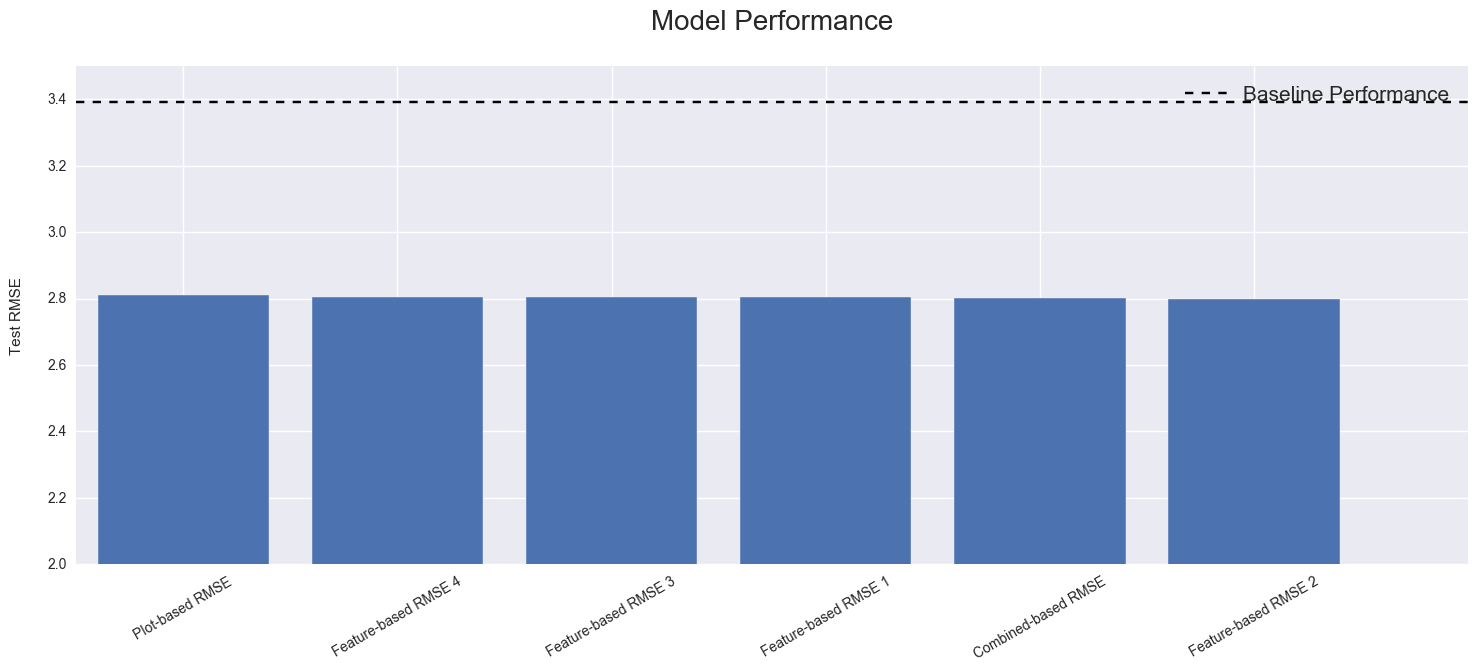

In [162]:
models = ['Feature-based RMSE 1', 'Feature-based RMSE 2', 'Feature-based RMSE 3', 
          'Feature-based RMSE 4', 'Plot-based RMSE', 'Combined-based RMSE']
RMSE = [2.8034, 2.8, 2.8034, 2.8038, 2.81, 2.801]

importances = np.array(RMSE)  
indices = np.argsort(importances)[::-1]

# Plot model performance
plt.figure(figsize = (16, 6))
plt.title("Model Performance\n", fontsize = 20)
plt.axhline(3.392, color = 'k', linestyle = '--', label = 'Baseline Performance')
plt.bar(range(len(models)), importances[indices], align="center")
plt.ylabel('Test RMSE\n')
plt.ylim(2, 3.5)
plt.xticks(range(len(models)), np.array(models)[indices], rotation=30)
plt.xlim([-0.5, len(models)])
plt.legend(loc = 'best', fontsize = 15)
plt.show()

From the graph we can see that all models improve over baseline model and were all pretty much the same to each other in terms of accuracy. The content based model using the movie plots performed the worst while the model using features, actors, directors, and genres, achieves the lowest RMSE among all other models.


|Model    | RMSE    | % improvement    |
|------ | ------|
|Baseline    | 3.392   | -    |
|Plot CB    | 2.810   | 17.15%    |
|Features 4 CB    | 2.8038   | 17.34%    |
|Features 3 CB   | 2.8034   | 17.35%    |
|Features 1 CB   | 2.8034   | 17.35%    |
|Combined CB   | 2.801   | 17.42%    |
|Features 2 CB   | 2.8   | 17.45%    |


The quality of recommendation could be improve by looking at different combinations of features.

## Movie Recommendations



Looking at the result of the different models it is cleat that Collaborative Filetering is the best performing model for prediciting similat movies.

I will use this model to predice movies to watch based on an initial movie selection and displaying the movies that are most similar.

In [163]:
from IPython.display import Image
from IPython.display import display

In [164]:
# Create a list of movies that have been rated
rec_movies = ratings_full
rec_movies.drop_duplicates(subset='movieId', keep='first', inplace=True)
rec_movies.sort_values(by='movieId', inplace=True)
rec_movies.reset_index(drop=True, inplace=True)
movies_list = list(ratings_full.title)

print 'There are', len(movies_list), 'movies that have been rated.'

There are 3706 movies that have been rated.


In [165]:
# Use the movies list to create a dictionary with the movie and it's index
movie_index = {}
for i in range(n_items):
    movie_index[i] = movies_list[i]

In [175]:
# Define a function to precict the closest k movies and print the results
def recommend_movies(similarity, mapper, movie_index, k=6):
    
    recommendations = [mapper[x] for x in np.argsort(similarity[movie_index,:])[:-k-1:-1]]
    
    for i, movie in enumerate(recommendations):
    
        index = np.where(rec_movies['title'] == movie)[0][0]
    
        if i == 0:
            print 'Because you selected\n', '---------------'
            print movie, '\n---------------'
            print 'Genre:\t\t', rec_movies.iloc[index, 1] 
            print 'Actors:\t\t', rec_movies.iloc[index, 5]
            print 'Director:\t', rec_movies.iloc[index, 6]
            print 'Runtime:\t', rec_movies.iloc[index, 7]
            print 'Certificate:\t', rec_movies.iloc[index, 8]
#            print 'Plot:\t\t', rec_movies.iloc[index, 4]
            display(Image(rec_movies.iloc[index, 11]))
            print '\nI would recommend.....'
            print'______________________________________________________________________________________________________'
        else:
            print '---------------\n', movie, '\n---------------'
            print 'Genre:\t\t', rec_movies.iloc[index, 1] 
            print 'Actors:\t\t', rec_movies.iloc[index, 5]
            print 'Director:\t', rec_movies.iloc[index, 6]
            print 'Runtime:\t', rec_movies.iloc[index, 7]
            print 'Certificate:\t', rec_movies.iloc[index, 8]
#            print 'Plot:\t\t', rec_movies.iloc[index, 4]
            display(Image(rec_movies.iloc[index, 11]))
            print'----------------------------------------------'

Let's test the function using some well known movies - 

- Casino (index # 15)
- Dumb & Dumber (index # 224)

First I will use the movie similarities from the baseline and then the movie similarities from the best performing model, user based k-35.

### Baseline Similarities

In [170]:
# Find the 3 movies closest to Casino

index = 15 # Casino
recommend_movies(item_similarity, movie_index, index, k=4)

Because you selected
---------------
Casino 
---------------
Genre:		Drama|Thriller
Actors:		Robert De Niro, Sharon Stone, Joe Pesci, James Woods
Director:	Martin Scorsese
Runtime:	178.0
Certificate:	R

I would recommend.....
______________________________________________________________________________________________________
---------------
Seven Samurai 
---------------
Genre:		Crime|Thriller
Actors:		Toshirô Mifune, Takashi Shimura, Keiko Tsushima, Yukiko Shimazaki
Director:	Akira Kurosawa
Runtime:	207.0
Certificate:	Not Rated
----------------------------------------------
---------------
A Few Good Men 
---------------
Genre:		Crime|Drama
Actors:		Tom Cruise, Jack Nicholson, Demi Moore, Kevin Bacon
Director:	Rob Reiner
Runtime:	138.0
Certificate:	R
----------------------------------------------
---------------
Goodfellas 
---------------
Genre:		Crime|Drama
Actors:		Robert De Niro, Ray Liotta, Joe Pesci, Lorraine Bracco
Director:	Martin Scorsese
Runtime:	146.0
Certificate:	R
-----

In [171]:
# Find the 3 movies closest to Dumb & Dumber

index = 224 # Dumb & Dumber
recommend_movies(item_similarity, movie_index, index, k=4)

Because you selected
---------------
Dumb and Dumber 
---------------
Genre:		Comedy
Actors:		Jim Carrey, Jeff Daniels, Lauren Holly, Mike Starr
Director:	Peter Farrelly, Bobby Farrelly
Runtime:	107.0
Certificate:	PG-13

I would recommend.....
______________________________________________________________________________________________________
---------------
Ace Ventura: Pet Detective 
---------------
Genre:		Comedy
Actors:		Jim Carrey, Courteney Cox, Sean Young, Tone Loc
Director:	Tom Shadyac
Runtime:	86.0
Certificate:	PG-13
----------------------------------------------
---------------
Liar Liar 
---------------
Genre:		Comedy
Actors:		Jim Carrey, Maura Tierney, Justin Cooper, Cary Elwes
Director:	Tom Shadyac
Runtime:	86.0
Certificate:	PG-13
----------------------------------------------
---------------
Wayne's World 
---------------
Genre:		Comedy
Actors:		Mike Myers, Dana Carvey, Rob Lowe, Tia Carrere
Director:	Penelope Spheeris
Runtime:	94.0
Certificate:	PG-13
------------------

### User Based k-35 Similarities

In [172]:
# First create a simalitiry matrix from the predicted ratings
sim = k_item_prediction.T.dot(k_item_prediction) + 1e-9
norms = np.array([np.sqrt(np.diagonal(sim))])
k_item_similarity =(sim / norms / norms.T)

In [173]:
# Find the 3 movies closest to Casino

index = 15 # Casino
recommend_movies(k_item_similarity, movie_index, index, k=4)

Because you selected
---------------
Casino 
---------------
Genre:		Drama|Thriller
Actors:		Robert De Niro, Sharon Stone, Joe Pesci, James Woods
Director:	Martin Scorsese
Runtime:	178.0
Certificate:	R

I would recommend.....
______________________________________________________________________________________________________
---------------
Donnie Brasco 
---------------
Genre:		Crime|Drama
Actors:		Al Pacino, Johnny Depp, Michael Madsen, Bruno Kirby
Director:	Mike Newell
Runtime:	127.0
Certificate:	R
----------------------------------------------
---------------
A Simple Plan 
---------------
Genre:		Crime|Thriller
Actors:		Bill Paxton, Bridget Fonda, Billy Bob Thornton, Brent Briscoe
Director:	Sam Raimi
Runtime:	121.0
Certificate:	R
----------------------------------------------
---------------
Cape Fear 
---------------
Genre:		Thriller
Actors:		Robert De Niro, Nick Nolte, Jessica Lange, Juliette Lewis
Director:	Martin Scorsese
Runtime:	128.0
Certificate:	R
-----------------------

In [174]:
# Find the 3 movies closest to Dumb and Dumber

index = 224 # Dumb & Dumber
recommend_movies(k_item_similarity, movie_index, index, k=4)

Because you selected
---------------
Dumb and Dumber 
---------------
Genre:		Comedy
Actors:		Jim Carrey, Jeff Daniels, Lauren Holly, Mike Starr
Director:	Peter Farrelly, Bobby Farrelly
Runtime:	107.0
Certificate:	PG-13

I would recommend.....
______________________________________________________________________________________________________
---------------
Ace Ventura: Pet Detective 
---------------
Genre:		Comedy
Actors:		Jim Carrey, Courteney Cox, Sean Young, Tone Loc
Director:	Tom Shadyac
Runtime:	86.0
Certificate:	PG-13
----------------------------------------------
---------------
White Men Can't Jump 
---------------
Genre:		Comedy
Actors:		Wesley Snipes, Woody Harrelson, Rosie Perez, Tyra Ferrell
Director:	Ron Shelton
Runtime:	115.0
Certificate:	R
----------------------------------------------
---------------
Tommy Boy 
---------------
Genre:		Comedy
Actors:		Chris Farley, David Spade, Brian Dennehy, Bo Derek
Director:	Peter Segal
Runtime:	97.0
Certificate:	PG-13
-----------

### Summary

Looking at the movies above we can see that there are some good recommendations for both models, but let's look at them again.

|    | Baseline Similarity    | User-Based Top k Similarity   |
|------ | ------|
| Initial Movie:   |  **Casino**  |  **Casino**   |
|  Recommendations:  | Seven Samurai   | Donnie Brasco   |
|  | A Few Good Men   | A Simple Plan    |
|    | Goodfellas   | Cape Fear    |
|   |    |     |
| Initial Movie:  |  **Dumb & Dumber**  |  **Dumb & Dumber**   |
|  Recommendations: | Ace Ventura: Pet Detective   | Ace Ventura: Pet Detective    |
|  | Liar Liar   | White Men Can't Jump    |
|   | Wayne's World   | Tommy Boy    |

We can see the both recommender systems returned largely the same movies. The recommendation for the User-Based Top k model are more accurate than for the Baseline, although there are similar movies selected for both the ordered ranking of them is different.

The movies recommendations share the following features with the initial movie choice -

- Genre
- Certificate
- Actors
- Directors

This in keeping with expected results and is the basis of the populatity bias problem with collaborative filtering. Because recommendations are based on the past ratings of users, it can prevent users from getting new or diverse recommendations that could be a better match.


There are some models that have been built to encourage the recommendation of diverse or 'serendipitous' items but these will not be explored in this project.

# Recommender System 

Define a function to predict movies based on user input.

In [176]:
# Create a movie index to allow selection by movie title
index_movie = {}
for i, m in enumerate(movies_list):
    index_movie[m] = i

In [177]:
def recommend_me():
    
    film = raw_input('What is your favourite movie? ')
    n = int(raw_input('How many results would you like to see? '))
    index = index_movie[film]
    
    recommend_movies(k_item_similarity, movie_index, index, k=(n+1))
    
    return

What is your favourite movie? Dune
How many results would you like to see? 5
Because you selected
---------------
Dune 
---------------
Genre:		Fantasy|Sci-Fi
Actors:		Francesca Annis, Leonardo Cimino, Brad Dourif, José Ferrer
Director:	David Lynch
Runtime:	137.0
Certificate:	PG-13


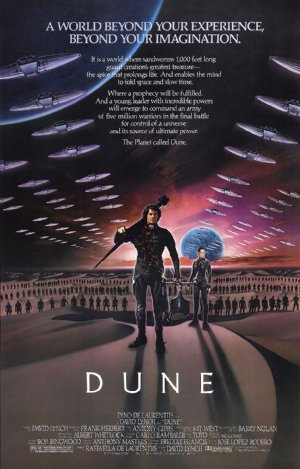


I would recommend.....
______________________________________________________________________________________________________
---------------
TRON 
---------------
Genre:		Action|Adventure|Fantasy|Sci-Fi
Actors:		Jeff Bridges, Bruce Boxleitner, David Warner, Cindy Morgan
Director:	Steven Lisberger
Runtime:	96.0
Certificate:	PG


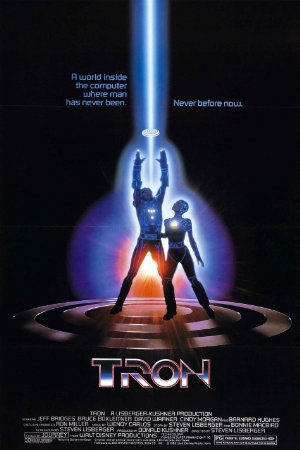

----------------------------------------------
---------------
Star Trek: The Motion Picture 
---------------
Genre:		Action|Adventure|Sci-Fi
Actors:		William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan
Director:	Robert Wise
Runtime:	132.0
Certificate:	G


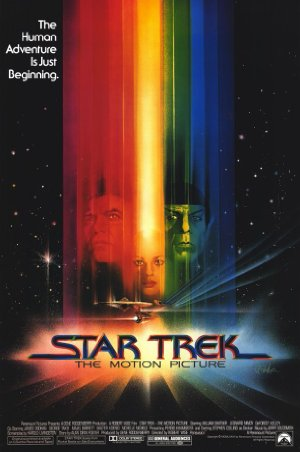

----------------------------------------------
---------------
The Adventures of Buckaroo Banzai Across the 8th Dimension 
---------------
Genre:		Adventure|Comedy|Sci-Fi
Actors:		Peter Weller, John Lithgow, Ellen Barkin, Jeff Goldblum
Director:	W.D. Richter
Runtime:	103.0
Certificate:	PG


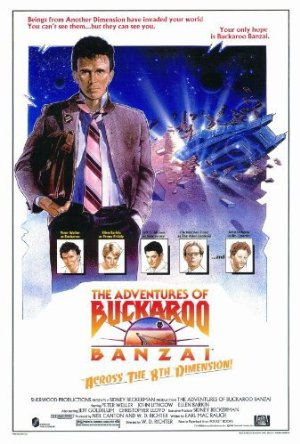

----------------------------------------------
---------------
2010 
---------------
Genre:		Mystery|Sci-Fi
Actors:		Roy Scheider, John Lithgow, Helen Mirren, Bob Balaban
Director:	Peter Hyams
Runtime:	116.0
Certificate:	PG


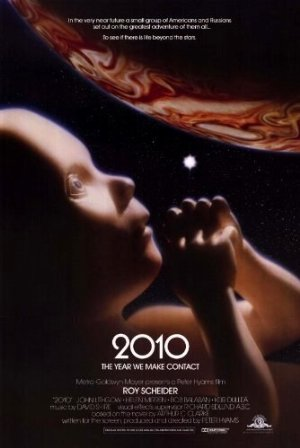

----------------------------------------------
---------------
Star Trek III: The Search for Spock 
---------------
Genre:		Action|Adventure|Sci-Fi
Actors:		William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan
Director:	Leonard Nimoy
Runtime:	105.0
Certificate:	PG


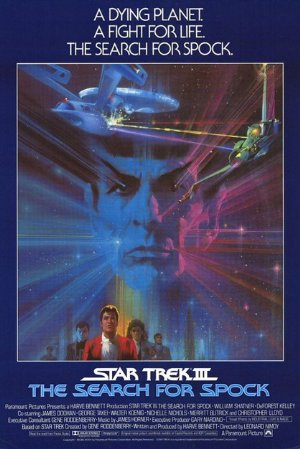

----------------------------------------------


In [178]:
recommend_me()